In [3]:
import pandas as pd

In [7]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


f(sepal.length,sepal.width,petal.length,petal.width)=variety
f(x)=y
f(x,y,z)=t
f model 

In [8]:
iris_df.shape

(150, 5)

In [10]:
iris_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [11]:
iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris_df.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [16]:
feature_columns = ['sepal.length', 'sepal.width', 'petal.length','petal.width']
# array (4,150)
# features
X = iris_df[feature_columns].values
# Model(X) = y
#target 
y = iris_df['variety'].values

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# x = x+1
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
import numpy as np 
# without duplicated values
np.unique(y)

array([0, 1, 2])

In [23]:
def test(x,y):
    return x+y

test(1,2)

3

In [38]:
def get2Var(x,y):
    return 'x='+str(x),'y='+str(y),'x+y='+str(x+y),'x-y='+str(x-y)

a,b,c,d=get2Var(1,2)

In [32]:
a

'x=1'

In [33]:
b

'y=2'

In [34]:
c

'x+y=3'

In [39]:
d

'x-y=-1'

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<Figure size 640x480 with 0 Axes>

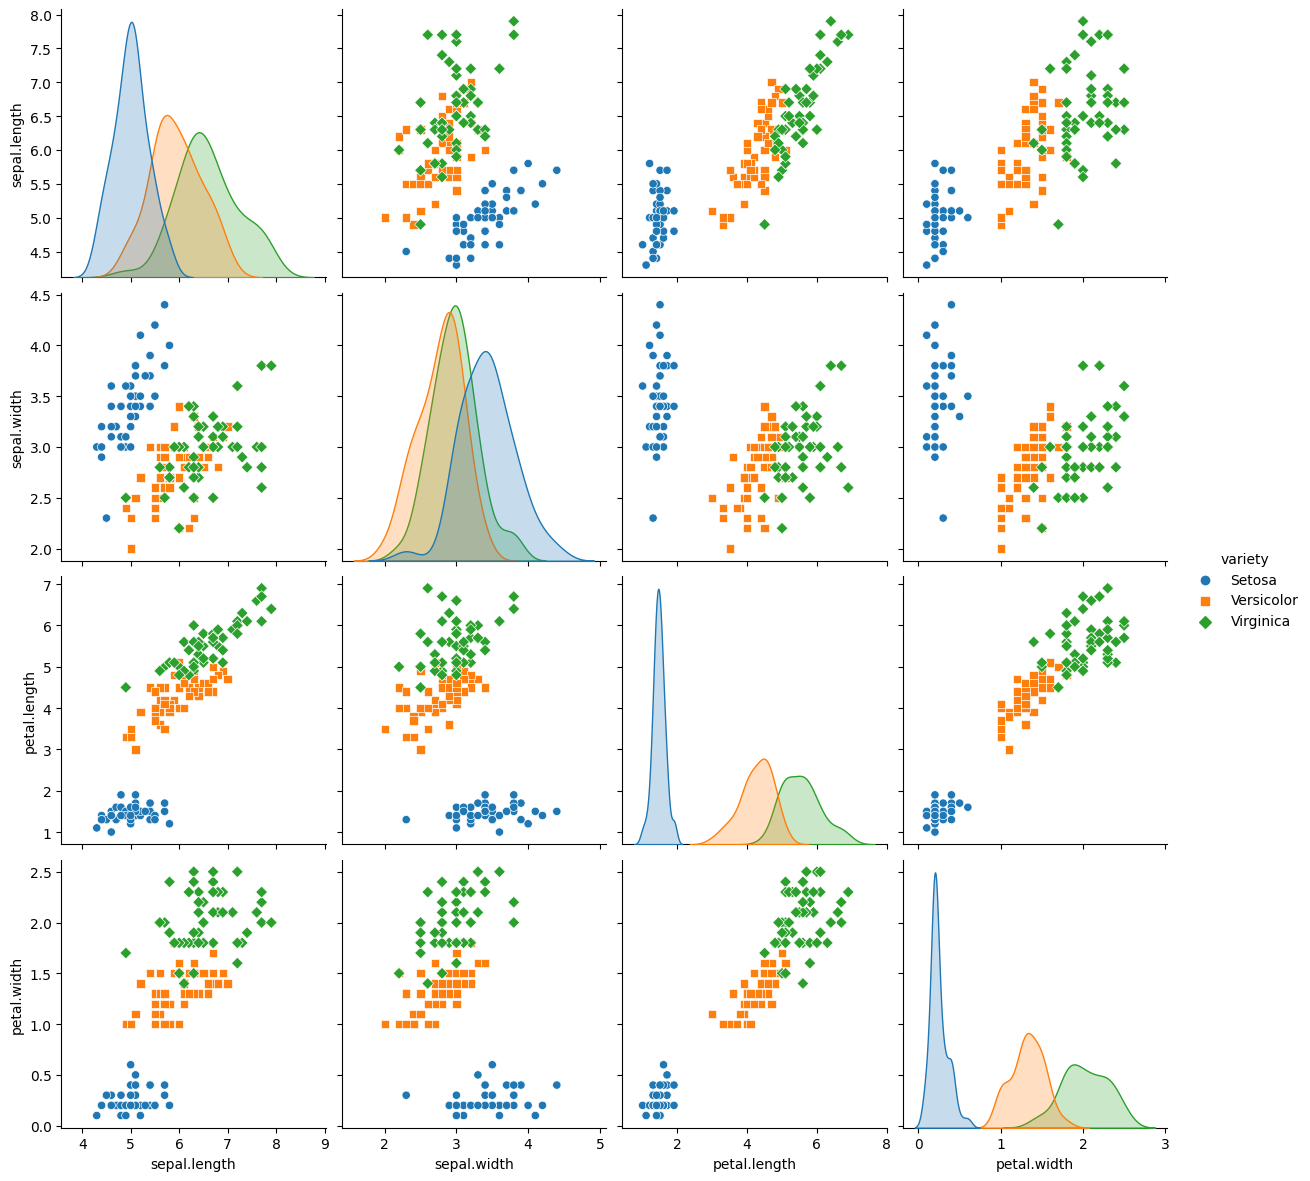

In [46]:
plt.figure()
sns.pairplot(iris_df, hue = "variety", height=3, markers=["o", "s", "D"])
plt.show()

Using KNN for classification

In [48]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [55]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=4)

In [56]:
# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [57]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [59]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [64]:
data = pd.read_csv('iris_test.csv')
data

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.4,3.0,4.5,1.5
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,6.9,3.1,5.1,2.3


In [65]:
feature_columns = ['sepal.length', 'sepal.width', 'petal.length','petal.width']
y_pred=classifier.predict(data[feature_columns].values)

In [66]:
y_pred

array([0, 0, 1, 0, 0, 2])

In [67]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

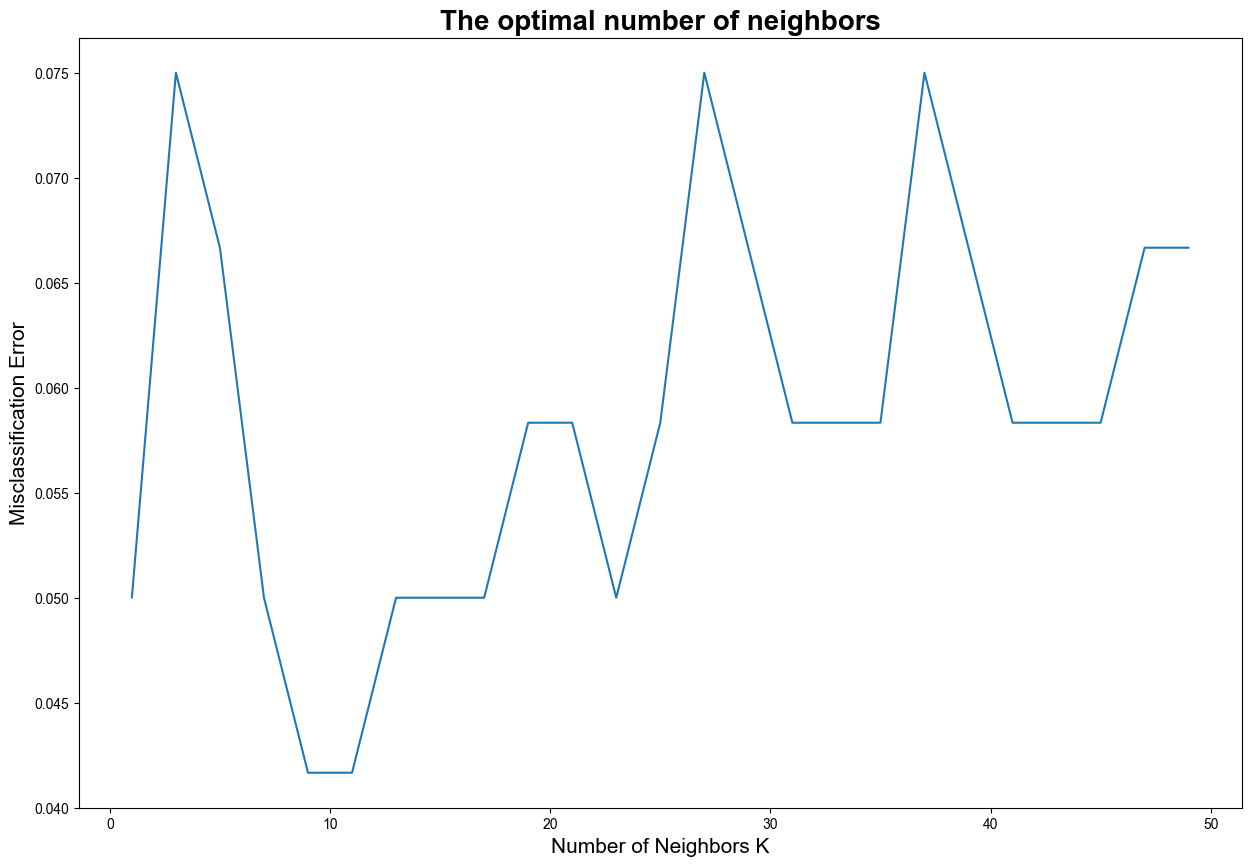

In [68]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()